# Türmeproblem

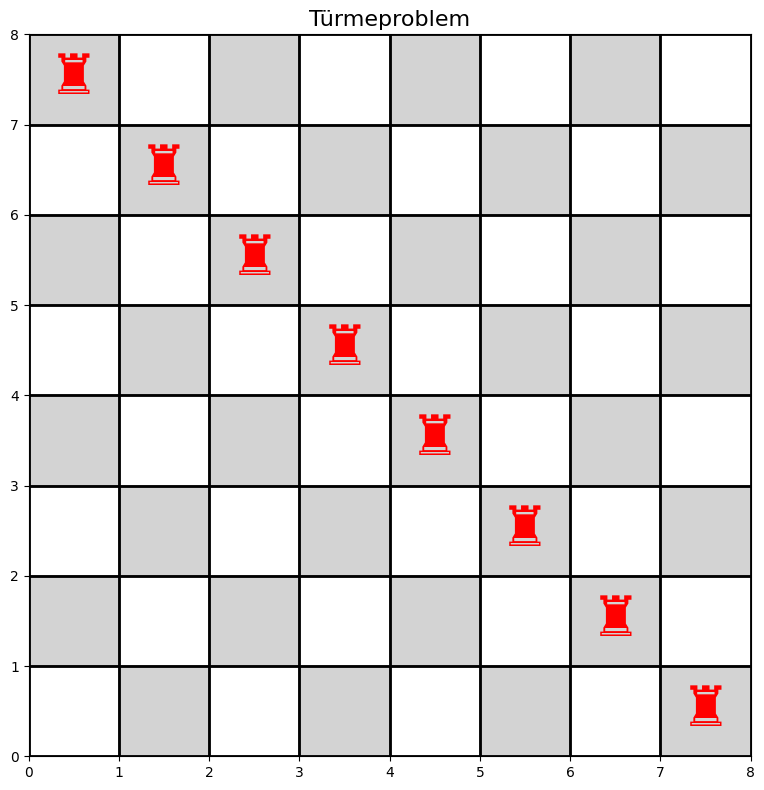

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_board(board, title="Türmeproblem"):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # Schachbrettmuster zeichnen
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                rect = patches.Rectangle((j, 7-i), 1, 1, linewidth=1, edgecolor='black', facecolor='lightgray')
                ax.add_patch(rect)
            else:
                rect = patches.Rectangle((j, 7-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)
    
    # Türme zeichnen
    for i in range(8):
        for j in range(8):
            if board[i][j] == 1:  # 1 bedeutet Turm
                ax.text(j + 0.5, 7-i + 0.5, '♜', fontsize=40, ha='center', va='center', color='red')
    
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=16)
    ax.set_xticks(range(9))
    ax.set_yticks(range(9))
    ax.grid(True, color='black', linewidth=2)
    
    plt.tight_layout()
    plt.show()

class TuermeProblem:
    def __init__(self):
        self.board = np.zeros((8,8), dtype=int)
    
    def is_safe(self, row, col):
        # Gehe über die gesamte Reihe und prüfe ob bereits ein Turm platziert wurde
        for i in range(8):
            if self.board[row][i] == 1:
                return False
        # Gehe über die gesamte Spalte und prüfe, ob bereits ein Turm platziert wurde
        for j in range(8):
            if self.board[j][col] == 1:
                return False
        # Wenn bis hier hin gekommen ist die Position safe
        return True
    
    def place(self, row, col):
        if self.board[row][col] == 0:
            self.board[row][col] = 1

    def solve(self, col):
        # Basisfall (alle Türme wurden platziert)
        if col >= 8:
            return
        
        for row in range(0,8):
            if self.is_safe(row, col):
                self.place(row, col)
                self.solve(col + 1)
                return


    def draw(self):
        draw_board(self.board)

board1 = TuermeProblem()
#board1.place(0,0)
#print(board1.is_safe(1,1))
board1.solve(0)
board1.draw()